In [17]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df.rename(columns=lambda x: x.strip(), inplace=True)

In [10]:
df = df.set_index('url')
df = df.drop('timedelta', axis =1)

In [11]:
df.head()

n_tokens_title  \
url                                                                  
http://mashable.com/2013/01/07/amazon-instant-v...              12   
http://mashable.com/2013/01/07/ap-samsung-spons...               9   
http://mashable.com/2013/01/07/apple-40-billion...               9   
http://mashable.com/2013/01/07/astronaut-notre-...               9   
http://mashable.com/2013/01/07/att-u-verse-apps/                13   

                                                    n_tokens_content  \
url                                                                    
http://mashable.com/2013/01/07/amazon-instant-v...               219   
http://mashable.com/2013/01/07/ap-samsung-spons...               255   
http://mashable.com/2013/01/07/apple-40-billion...               211   
http://mashable.com/2013/01/07/astronaut-notre-...               531   
http://mashable.com/2013/01/07/att-u-verse-apps/                1072   

                                                    n_unique_tokens  \
url                                                                   
http://mashable.com/2013/01/07/amazon-instant-v...         0.663594   
http://mashable.com/2013/01/07/ap-samsung-spons...         0.604743   
http://mashable.com/2013/01/07/apple-40-billion...         0.575130   
http://mashable.com/2013/01/07/astronaut-notre-...         0.503788   
http://mashable.com/2013/01/07/att-u-verse-apps/           0.415646   

                                                    n_non_stop_words  \
url                                                                    
http://mashable.com/2013/01/07/amazon-instant-v...                 1   
http://mashable.com/2013/01/07/ap-samsung-spons...                 1   
http://mashable.com/2013/01/07/apple-40-billion...                 1   
http://mashable.com/2013/01/07/astronaut-notre-...                 1   
http://mashable.com/2013/01/07/att-u-verse-apps/                   1   

                                                    n_non_stop_unique_tokens  \
url                                                                            
http://mashable.com/2013/01/07/amazon-instant-v...                  0.815385   
http://mashable.com/2013/01/07/ap-samsung-spons...                  0.791946   
http://mashable.com/2013/01/07/apple-40-billion...                  0.663866   
http://mashable.com/2013/01/07/astronaut-notre-...                  0.665635   
http://mashable.com/2013/01/07/att-u-verse-apps/                    0.540890   

                                                    num_hrefs  num_self_hrefs  \
url                                                                             
http://mashable.com/2013/01/07/amazon-instant-v...          4               2   
http://mashable.com/2013/01/07/ap-samsung-spons...          3               1   
http://mashable.com/2013/01/07/apple-40-billion...          3               1   
http://mashable.com/2013/01/07/astronaut-notre-...          9               0   
http://mashable.com/2013/01/07/att-u-verse-apps/           19              19   

                                                    num_imgs  num_videos  \
url                                                                        
http://mashable.com/2013/01/07/amazon-instant-v...         1           0   
http://mashable.com/2013/01/07/ap-samsung-spons...         1           0   
http://mashable.com/2013/01/07/apple-40-billion...         1           0   
http://mashable.com/2013/01/07/astronaut-notre-...         1           0   
http://mashable.com/2013/01/07/att-u-verse-apps/          20           0   

                                                    average_token_length  \
url                                                                        
http://mashable.com/2013/01/07/amazon-instant-v...              4.680365   
http://mashable.com/2013/01/07/ap-samsung-spons...              4.913725   
http://mashable.com/2013/01/07/apple-40-billion...              4.393365   
http://mash

In [14]:
df.shape

(39644, 59)

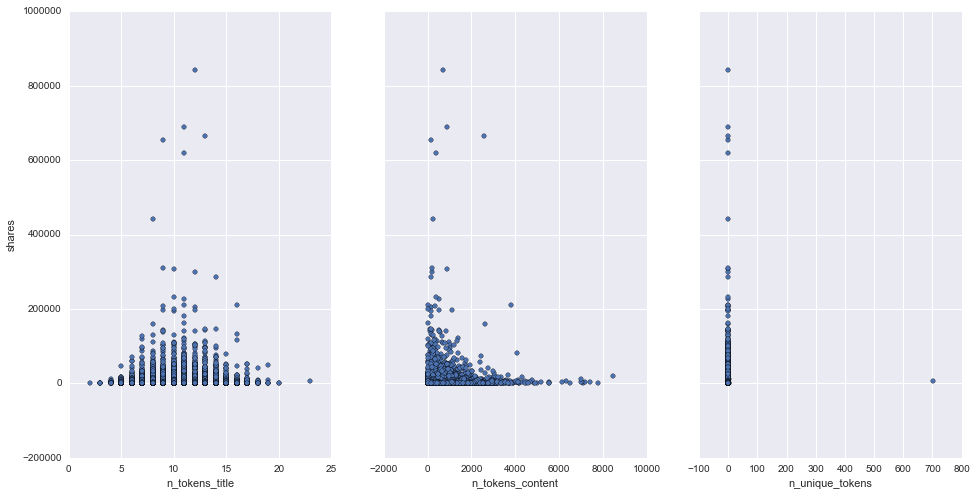

In [24]:
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='n_tokens_title', y='shares', ax=axs[0], figsize=(16,8))
df.plot(kind='scatter', x='n_tokens_content', y='shares', ax=axs[1])
df.plot(kind='scatter', x='n_unique_tokens', y = 'shares', ax=axs[2])


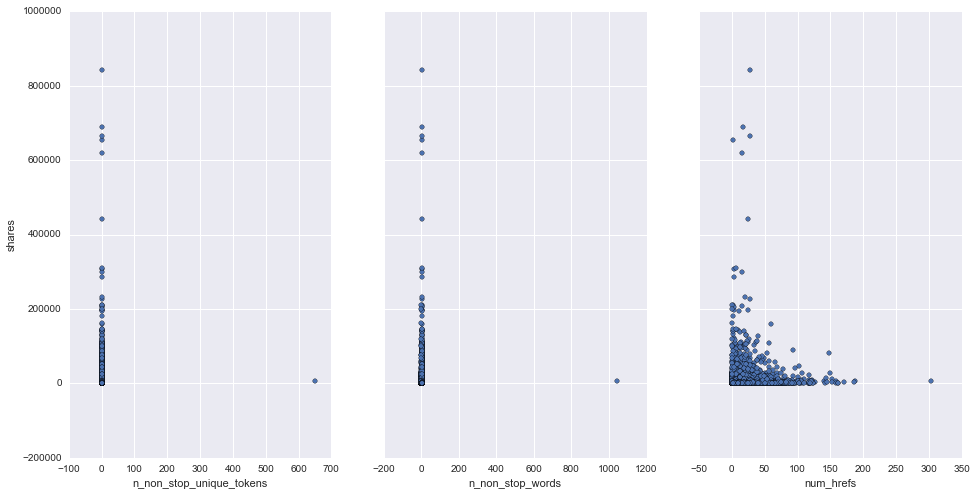

In [25]:
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='n_non_stop_unique_tokens', y = 'shares', ax=axs[0], figsize=(16,8))
df.plot(kind='scatter', x='n_non_stop_words', y = 'shares', ax=axs[1])
df.plot(kind='scatter', x='num_hrefs', y = 'shares', ax=axs[2])

In [4]:
df.shares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [26]:
df.columns.values

array(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rat

In [27]:
y = df.shares
X = df.drop('shares', axis=1)

In [31]:
import statsmodels.formula.api as smf

In [41]:
lm = smf.ols(formula='shares ~ n_tokens_title + n_tokens_content + n_unique_tokens + n_non_stop_words + n_non_stop_unique_tokens + num_hrefs + num_self_hrefs + num_imgs + num_videos + average_token_length + num_keywords + data_channel_is_lifestyle + data_channel_is_entertainment + data_channel_is_bus + data_channel_is_socmed + data_channel_is_tech + data_channel_is_world + kw_min_min + kw_max_min + kw_avg_min + kw_min_max + kw_max_max + kw_avg_max + kw_min_avg + kw_max_avg + kw_avg_avg + self_reference_min_shares + self_reference_max_shares + self_reference_avg_sharess + weekday_is_monday + weekday_is_tuesday + weekday_is_wednesday + weekday_is_thursday + weekday_is_friday + weekday_is_saturday + weekday_is_sunday + is_weekend + LDA_00 + LDA_01 + LDA_02 + LDA_03 + LDA_04 + global_subjectivity + global_sentiment_polarity + global_rate_positive_words + global_rate_negative_words + rate_positive_words + rate_negative_words + avg_positive_polarity + min_positive_polarity + max_positive_polarity + avg_negative_polarity + min_negative_polarity + max_negative_polarity + title_subjectivity + title_sentiment_polarity + abs_title_subjectivity + abs_title_sentiment_polarity', data=df).fit()

In [43]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     16.71
Date:                Tue, 10 May 2016   Prob (F-statistic):          8.49e-158
Time:                        16:29:12   Log-Likelihood:            -4.2690e+05
No. Observations:               39644   AIC:                         8.539e+05
Df Residuals:                   39587   BIC:                         8.544e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------
Intercept                     -1.499e+05   5.21e+06     -0.029      0.977     -1.04e+07  1.01e+07
n_tokens_title                   89.8590     28.671      3.134      0.002        33.662   146.056
n_tokens_content                  0.5936      0.224      2.656      0.008         0.156     1.032
n_unique_tokens                3985.3281   1918.563      2.077      0.038       224.899  7745.757
n_non_stop_words              -1483.6590   5910.913     -0.251      0.802     -1.31e+04  1.01e+04
n_non_stop_unique_tokens      -1640.5079   1629.463     -1.007      0.314     -4834.294  1553.279
num_hrefs                        26.5413      6.706      3.958      0.000        13.397    39.686
num_self_hrefs                  -57.6437     17.818     -3.235      0.001       -92.567   -22.720
num_imgs                         11.8973      8.942      1.330      0.183        -5.629    29.424
num_videos                        5.6446     15.751      0.358      0.720       -25.227    36.516
average_token_length           -586.7280    242.856     -2.416      0.016     -1062.731  -110.725
num_keywords                     49.4938     37.137      1.333      0.183       -23.295   122.282
data_channel_is_lifestyle     -1050.0274    394.651     -2.661      0.008     -1823.553  -276.502
data_channel_is_entertainment -1180.4984    255.195     -4.626      0.000     -1680.687  -680.310
data_channel_is_bus            -802.3199    382.716     -2.096      0.036     -1552.452   -52.188
data_channel_is_socmed         -602.9408    372.377     -1.619      0.105     -1332.809   126.927
data_channel_is_tech           -550.9452    371.426     -1.483      0.138     -1278.948   177.058
data_channel_is_world          -483.0776    376.363     -1.284      0.199     -1220.758   254.603
kw_min_min                        2.2088      1.623      1.361      0.174        -0.973     5.391
kw_max_min                        0.0872      0.050      1.739      0.082        -0.011     0.185
kw_avg_min                       -0.3468      0.308     -1.127      0.260        -0.950     0.257
kw_min_max                       -0.0021      0.001     -1.761      0.078        -0.004     0.000
kw_max_max                       -0.0005      0.001     -0.890      0.373        -0.002     0.001
kw_avg_max                       -0.0007      0.001     -0.867      0.386        -0.002     0.001
kw_min_avg                       -0.3659      0.076     -4.836      0.000        -0.514    -0.218
kw_max_avg                       -0.2026      0.025     -8.010      0.000        -0.252    -0.153
kw_avg_avg                        1.6625      0.144     11.558      0.000         1.381     1.944
self_reference_min_shares         0.0262      0.008      3.476      0.001         0.011     0.041
self_reference_max_shares         0.0058     

In [ ]:
lm = smf.ols(formula=’shares ~ n_tokens_title + n_tokens_content + n_unique_tokens + n_non_stop_words + n_non_stop_unique_tokens + num_hrefs + num_self_hrefs + num_imgs + num_videos + average_token_length + num_keywords + data_channel_is_lifestyle + data_channel_is_entertainment + data_channel_is_bus + data_channel_is_socmed + data_channel_is_tech + data_channel_is_world + kw_min_min + kw_max_min + kw_avg_min + kw_min_max + kw_max_max + kw_avg_max + kw_min_avg + kw_max_avg + kw_avg_avg + self_reference_min_shares + self_reference_max_shares + self_reference_avg_sharess + weekday_is_monday + weekday_is_tuesday + weekday_is_wednesday + weekday_is_thursday + weekday_is_friday + weekday_is_saturday + weekday_is_sunday + is_weekend + LDA_00 + LDA_01 + LDA_02 + LDA_03 + LDA_04 + global_subjectivity + global_sentiment_polarity + global_rate_positive_words + global_rate_negative_words + rate_positive_words + rate_negative_words + avg_positive_polarity + min_positive_polarity + max_positive_polarity + avg_negative_polarity + min_negative_polarity + max_negative_polarity + title_subjectivity + title_sentiment_polarity + abs_title_subjectivity + abs_title_sentiment_polarity’, data=data).fit()